__Exercici 1__

__Creieu que les regles d'associació són el mètode més adequat per aconseguir els objectius que us havíeu proposat? Justifiqueu la resposta tot raonant-la.
Com podria ser el model resultant?
Doneu un exemple de la interpretació que es podria derivar del model generat.__


La veritat és que el projecte que havia presentat per millorar la predicció del número adient de filtres de seguretat oberts en un aeroport no me sembla que les regles d'associació sigui el mètode més adequat. Hi ha altres mètodes que semblen més adequats, com ja hem vist en anteriors PACs, però així i tot es podria fer servir. Es tractaria, en aquest cas, de definir uns rangs de valor per la predicció d'afluència de passatgers i pels temps d'espera en les cues. Així, per a cada registre l'atribut *Passatgers_previstos* passaria de ser un valor enter a ser un rang de valors, que per exemple podrien ser el que vaig considerar a la PAC 3:
- Rang 1: de 0 a 299 passatgers per hora.
- Rang 2: de 300 a 599 passatgers per hora.
- Rang 3: de 600 a 899 passatgers per hora.
- Rang 4: Més de 900 passatgers per hora.

I l'atribut *Temps_de_cua* també quedaria definit entre uns rangs, que seguint amb l'exemple de la PAC 3, podrien ser:
- Rang 1: Fins a 3 minuts.
- Rang 2: De 3 a 6 minuts.
- Rang 3: De 6 a 8 minuts.
- Rang 4: A partir de 8 minuts.

Amb aquests possibles valors pels atributs passariem a fer l'expansió a valors binaris i ja podriem aplicar algun mètode d'obtenció de les regles d'associació.

En aquest exemple que acabo d'explicar l'únic que caldria seria trobar un mètode per trobar els llindars que separen els rangs entre sí. Se m'ocorre que podriem fer servir algun dels mètodes vists anteriorment, en les anteriors PACs, per trobar aquests rangs adients, amb arbres de decissió o amb algun mètode d'agrupació, i un cop trobats els podriem aplicar al mètode de les regles d'associació. Vist així, ja no em semble que aquest mètode sigui tan poc adequat com em semblava en un principi, llàstima de no poder disposar de les dades per poder analitzar-les i fer un xequeig de la idoneitat o no d'aquest mètode.

__Exercici 2__

__En aquest exercici  seguireu els passos del cicle de vida d'un projecte de mineria de dades pel cas d'un algorisme de generació de regles d'associació.  Ho fareu amb el fitxer Lastfm.csv. Que trobareu a la wiki. Aquest fitxer conté un conjunt  de registres. Aquests registres són l'històric de les cançons que ha escoltat un usuari («user») en un portal Web de musica. «artist» és el nom del grup que ha escoltat, «sex» i «country» es corresponen a variables que descriuen a l'usuari.
Estudieu i compreneu les dades, per exemple: Número de registres dels fitxer? Distribucions de valors per variables? Hi ha camps mal informats o buits? Atenció que hi ha molts registres!!!! Feu un petit resum de nombre d'usuaris, distribució per sexe o país... Quants grups musicals hi han?  Enteneu que són propostes que us faig per orientar l'exercici.
Prepareu les dades.  Atenció. El primer pas sempre és binaritzar les dades com teniu explicat al material docent. En R i per aquest fitxer jo proposo fer-ho de la següent forma:__

Per començar, especifico la ruta al directori de treball. A continuació carrego el fitxer *Lastfm.csv* a l’entorn de R, en un dataframe amb nom *lastFM*. Comprovo que s’ha carregat correctament amb la funció head(), que mostra en consola les primeres files del fitxer.

In [1]:
setwd("C:/Users/Lluís/Documents/UOC/Màster en Data Science/Mineria de Dades/PAC5")
lastFM <- read.csv(file="Lastfm.csv", header=TRUE, sep=",")
head(lastFM)

user,artist,sex,country
1,red hot chili peppers,f,Germany
1,the black dahlia murder,f,Germany
1,goldfrapp,f,Germany
1,dropkick murphys,f,Germany
1,le tigre,f,Germany
1,schandmaul,f,Germany


Veiem que s'ha carregat correctament. Passo a mirar les dimensions del dataframe *lastFM*:

In [2]:
dim(lastFM)

[1] 289955      4

Aquest resultat ens diu que el dataframe *lastFM* té 289.955 files i 4 columnes, és a dir, que té 289.955 registres i hi ha 4 atributs. Anem a veure ara la distribució de les variables, amb la funció summary():

In [3]:
summary(lastFM)

      user                         artist       sex       
 Min.   :    1   radiohead            :  2704   f: 78132  
 1st Qu.: 4935   the beatles          :  2668   m:211823  
 Median : 9838   coldplay             :  2378             
 Mean   : 9852   red hot chili peppers:  1786             
 3rd Qu.:14769   muse                 :  1711             
 Max.   :19718   metallica            :  1670             
                 (Other)              :277038             
           country      
 United States : 59558  
 United Kingdom: 27638  
 Germany       : 24251  
 Poland        : 17111  
 Sweden        : 12379  
 Brazil        : 11922  
 (Other)       :137096  

Anem a veure quants d'usuaris tenim:

In [4]:
num_users <- dim(unique(subset(lastFM, select=c('user'))))
num_users

[1] 15000     1

Tenim 15.000 usuaris diferents. Anem a veure quantes dones i quants homes hi ha:

In [5]:
num_dones <- dim(unique(subset(lastFM, sex == 'f', select=c('user'))))
num_homes <- dim(unique(subset(lastFM, sex == 'm', select=c('user'))))

prop_dones <-  100 * num_dones / num_users
prop_homes <- 100 * num_homes / num_users

num_dones[1]
prop_dones[1]
num_homes[1]
prop_homes[1]

[1] 3851

[1] 25.67333

[1] 11149

[1] 74.32667

Tenim que hi ha 3.851 dones, que representen el 25,67% dels usuaris, i 11.149 homes, que representen el 74,33% del usuaris. Anem a veure ara quants de grups o artistes hi ha:

In [6]:
dim(unique(subset(lastFM, select=c('artist'))))

[1] 1004    1

Hi ha 1.004 artistes diferents. Passem ara a veure de quants paisos diferents són els usuaris:

In [7]:
dim(unique(subset(lastFM, select=c('country'))))

[1] 159   1

Hi ha 159 paisos diferents. A nem a veure quins són els paisos dels quals provenen la majoria dels usuaris:

In [8]:
summary(unique(subset(lastFM, select=c('user', 'country'))))

      user                     country    
 Min.   :    1   United States     :2905  
 1st Qu.: 4956   Germany           :1257  
 Median : 9858   United Kingdom    :1256  
 Mean   : 9858   Poland            : 983  
 3rd Qu.:14751   Russian Federation: 785  
 Max.   :19718   Brazil            : 630  
                 (Other)           :7184  

Veiem com els paisos més representats pels usuaris són Estats Units, Alemània, Regne Unit i Polònia.

Després de veure aquestes dades sobre el dataset, passem a aplicar el mètode de les regles d'associació. Volem una llista per cada usuari dels grups que escolta. Eliminen sexe i país:

In [9]:
artists_per_user_list <- split(x=lastFM[,"artist"],f=lastFM$user)

Anem a veure quin aspecte té aquesta llista:

In [10]:
head(artists_per_user_list)

$`1`
 [1] red hot chili peppers   the black dahlia murder goldfrapp              
 [4] dropkick murphys        le tigre                schandmaul             
 [7] edguy                   jack johnson            eluveitie              
[10] the killers             judas priest            rob zombie             
[13] john mayer              the who                 guano apes             
[16] the rolling stones     
1004 Levels: ...and you will know us by the trail of dead [unknown] ... zero 7

$`3`
 [1] devendra banhart    boards of canada    cocorosie          
 [4] aphex twin          animal collective   atmosphere         
 [7] joanna newsom       air                 portishead         
[10] massive attack      broken social scene arcade fire        
[13] plaid               prefuse 73          m83                
[16] the flashbulb       pavement            goldfrapp          
[19] amon tobin          sage francis        four tet           
[22] max richter         autechre            radiohead          
[25] neutral milk hotel  beastie boys        aesop rock         
[28] mf doom             the books          
1004 Levels: ...and you will know us by the trail of dead [unknown] ... zero 7

$`4`
 [1] tv on the radio         tool                    kyuss                  
 [4] dj shadow               air                     a tribe called quest   
 [7] the cinematic orchestra beck                    bon iver               
[10] rÃ¶yksopp               bonobo                  the decemberists       
[13] snow patrol             battles                 the prodigy            
[16] pink floyd              rjd2                    the flaming lips       
[19] michael jackson         mgmt                    the rolling stones     
[22] late of the pier        flight of the conchords simian mobile disco    
[25] muse                    fleetwood mac           led zeppelin           
1004 Levels: ...and you will know us by the trail of dead [unknown] ... zero 7

$`5`
 [1] dream theater            ac/dc                    metallica               
 [4] iron maiden              bob marley & the wailers megadeth                
 [7] children of bodom        trivium                  nightwish               
[10] sublime                  volbeat                 
1004 Levels: ...and you will know us by the trail of dead [unknown] ... zero 7

$`6`
 [1] lily allen           kanye west           sigur rÃ³s          
 [4] pink floyd           stevie wonder        metallica           
 [7] thievery corporation iron maiden          the streets         
[10] muse                 faith no more        manu chao           
[13] tenacious d          depeche mode         justin timberlake   
[16] green day            snow patrol          dream theater       
[19] u2                   jay-z                type o negative     
[22] pearl jam            queen               
1004 Levels: ...and you will know us by the trail of dead [unknown] ... zero 7

$`7`
 [1] soundgarden         stone temple pilots buckethead         
 [4] dream theater       alice in chains     type o negative    
 [7] pink floyd          rush                king crimson       
[10] camel               ac/dc               tool               
[13] disturbed           oasis               jethro tull        
[16] porcupine tree      audioslave          aerosmith          
[19] pearl jam           the verve           rammstein          
[22] led zeppelin       
1004 Levels: ...and you will know us by the trail of dead [unknown] ... zero 7

Efectivament, veiem que per cada usuari es mostra una llista dels grups que escolta. Anem a veure què mostra la funció *summary()*:

In [11]:
summary(artists_per_user_list)

      Length Class  Mode   
1     16     factor numeric
3     29     factor numeric
4     27     factor numeric
5     11     factor numeric
6     23     factor numeric
7     22     factor numeric
9     19     factor numeric
12    30     factor numeric
13     7     factor numeric
14     8     factor numeric
18    11     factor numeric
19    41     factor numeric
20    28     factor numeric
22    32     factor numeric
23    12     factor numeric
24    15     factor numeric
25     8     factor numeric
28    26     factor numeric
29    20     factor numeric
31    22     factor numeric
32    23     factor numeric
33    33     factor numeric
34    27     factor numeric
35    33     factor numeric
36    12     factor numeric
38    12     factor numeric
39    11     factor numeric
40    15     factor numeric
41    11     factor numeric
42     9     factor numeric
43    37     factor numeric
44    33     factor numeric
45    34     factor numeric
46    44     factor numeric
47    28     factor 

A continuació, si hi ha duplicats els eliminen:

In [12]:
artists_per_user_list <- lapply(artists_per_user_list,unique)

 I ara binaritzem les dades. Per això, primer, cal carregar el paquet *arules*:

In [13]:
install.packages("arules", repos = "http://cran.us.r-project.org")

package 'arules' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Lluís\AppData\Local\Temp\RtmpSYLbA1\downloaded_packages


Ara carreguem la llibreria:

In [14]:
library(arules)

Warning message:
"package 'arules' was built under R version 3.4.3"Loading required package: Matrix
Warning message:
"package 'Matrix' was built under R version 3.4.3"
Attaching package: 'arules'

The following objects are masked from 'package:base':

    abbreviate, write



I ara ja puc passar a binaritzar les dades:

In [15]:
artists_per_user_list <- as(artists_per_user_list,"transactions")

Anem primer a explorar les dades abans de construir les regles. Mostrem un gràfic amb les freqüències dels 20 ítems més nombrosos:

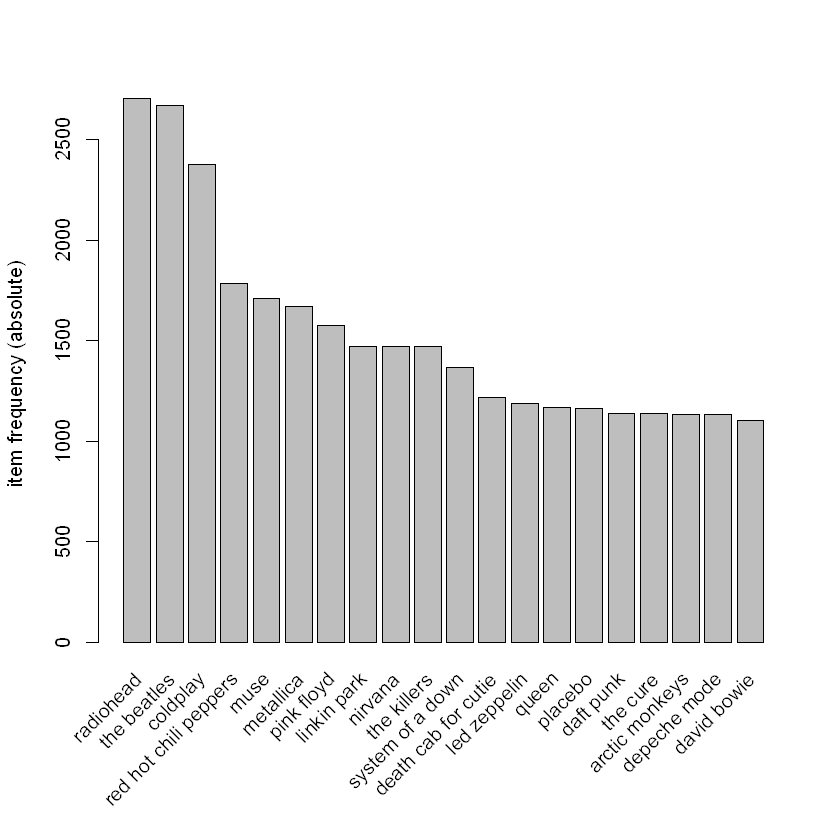

In [16]:
itemFrequencyPlot(artists_per_user_list,topN=20,type="absolute")

Veiem així quins són els grups més escoltats. Ara passem a mirar les estadístiques del resultat, amb la funció *summary()*:

In [17]:
summary(artists_per_user_list)

transactions as itemMatrix in sparse format with
 15000 rows (elements/itemsets/transactions) and
 1004 columns (items) and a density of 0.01925319 

most frequent items:
            radiohead           the beatles              coldplay 
                 2704                  2668                  2378 
red hot chili peppers                  muse               (Other) 
                 1786                  1711                278706 

element (itemset/transaction) length distribution:
sizes
  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
185 222 280 302 359 385 472 461 491 501 504 482 472 471 479 477 456 455 444 455 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
436 478 426 438 408 446 417 375 348 340 316 293 274 286 238 208 193 181 128 102 
 41  42  43  44  45  46  47  48  49  50  51  52  54  55  63  76 
 93  61  55  36  23  15   6  11   2   1   5   3   1   2   1   1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 

•	__Genereu un model de regles d'associació__

Ara ja podem passar a trobar les regles. Hem de passar uns valors mínims pel suport i la confiança. Recordem que el suport és la fracció de files del dataset que contenen el conjunt d'ítems que apareixen a l'esquerra de les regles, i la confiança és la probabilitat de que una regla sigui correcta per una nova transacció amb ítems a l'esquerra.

Així, provem amb un suport mínim de 0.01, és a dir, un 1%, i una confiança de 0.8, és a dir, del 80%:

In [18]:
rules <- apriori(artists_per_user_list, parameter = list(supp = 0.01, conf = 0.8))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.01      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 150 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[1004 item(s), 15000 transaction(s)] done [0.05s].
sorting and recoding items ... [655 item(s)] done [0.00s].
creating transaction tree ... done [0.02s].
checking subsets of size 1 2 3 4 done [0.05s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


A la penúltima línia del log que ens mostra veiem que s'han generat 0 regles. Segurament hem agafat un valor massa alt pel suport. Anam a provar amb un suport=0.1% i amb la mateixa confiança=80%:

In [19]:
rules <- apriori(artists_per_user_list, parameter = list(supp = 0.001, conf = 0.8))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 15 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[1004 item(s), 15000 transaction(s)] done [0.03s].
sorting and recoding items ... [1004 item(s)] done [0.02s].
creating transaction tree ... done [0.01s].
checking subsets of size 1 2 3 4 5 6 7 done [1.70s].
writing ... [11829 rule(s)] done [0.09s].
creating S4 object  ... done [0.06s].


Ara sí, veiem que s'han generat 11.829 regles. Ara mostrem les 10 primeres regles, però només amb 2 dígits:

In [20]:
options(digits=2)
inspect(rules[1:10])

     lhs                                rhs                support confidence
[1]  {jay-z,o.s.t.r.}                => {nas}              0.0011  0.80      
[2]  {above & beyond,blank & jones}  => {ferry corsten}    0.0014  0.81      
[3]  {above & beyond,blank & jones}  => {paul van dyk}     0.0015  0.85      
[4]  {above & beyond,blank & jones}  => {armin van buuren} 0.0015  0.88      
[5]  {above & beyond,chicane}        => {ferry corsten}    0.0015  0.85      
[6]  {above & beyond,chicane}        => {armin van buuren} 0.0015  0.85      
[7]  {above & beyond,chicane}        => {atb}              0.0015  0.81      
[8]  {above & beyond,delerium}       => {armin van buuren} 0.0011  0.89      
[9]  {above & beyond,ferry corsten}  => {armin van buuren} 0.0030  0.85      
[10] {above & beyond,paul oakenfold} => {paul van dyk}     0.0011  0.81      
     lift count
[1]  32   16   
[2]  94   21   
[3]  73   22   
[4]  52   23   
[5]  99   23   
[6]  51   23   
[7]  40   22   
[8]  53   16  

Anem ara a visualitzar informació interessant mitjançant la funció *summary()*:

In [21]:
summary(rules)

set of 11829 rules

rule length distribution (lhs + rhs):sizes
   3    4    5    6    7 
 294 4935 5226 1277   97 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    3.0     4.0     5.0     4.7     5.0     7.0 

summary of quality measures:
    support         confidence        lift         count   
 Min.   :0.0010   Min.   :0.80   Min.   :  4   Min.   :15  
 1st Qu.:0.0011   1st Qu.:0.82   1st Qu.:  5   1st Qu.:16  
 Median :0.0011   Median :0.84   Median : 10   Median :17  
 Mean   :0.0012   Mean   :0.86   Mean   : 14   Mean   :18  
 3rd Qu.:0.0013   3rd Qu.:0.88   3rd Qu.: 17   3rd Qu.:19  
 Max.   :0.0039   Max.   :1.00   Max.   :124   Max.   :59  

mining info:
                  data ntransactions support confidence
 artists_per_user_list         15000   0.001        0.8

Amb el sumari veiem que el número de regles és de 11.829, i que tenim una majoria de regles formades per 4 o 5 ítems. També ens mostra un sumari de les mesures de qualitat i informació sobre de les dades minades.

Una cosa que veiem, també, és que les regles no estan ordenades. Normalment voldrem veure les regles més relevants en primer lloc. Per exemple, considerem que volem veure primer les regles més probables: Això ho farem ordenant segons la confiança:

In [22]:
rules<-sort(rules, by="confidence", decreasing=TRUE)

Ara mostrem les 20 primeres regles:

In [23]:
inspect(rules[1:20])

     lhs                                  rhs                     support confidence lift count
[1]  {black label society,                                                                     
      godsmack}                        => {metallica}              0.0011          1    9    17
[2]  {basement jaxx,                                                                           
      underworld}                      => {the chemical brothers}  0.0011          1   23    16
[3]  {kate nash,                                                                               
      the last shadow puppets}         => {arctic monkeys}         0.0010          1   13    15
[4]  {above & beyond,                                                                          
      blank & jones,                                                                           
      chicane}                         => {paul van dyk}           0.0011          1   86    16
[5]  {aphex twin,                       

Veiem com aquestes 10 regles tenen una confiança molt alta, d'un 100%.

•	__Quina és la qualitat del model?__

Segons el sumari de les mesures de qualitat, tenim que el suport va del valor mínim que hem triat, un 0.1%, fins a un valor màxim del 0.39%, amb un valor mitjà del 0.12%. La confiança va del valor mínim triat, 0.80%, fins a un valor màxim del 100%, amb una mitjana del 0.86%.

•	__Quines regles interessants trobeu?__

Així com hem ordenat segons la confiança, anem ara a ordenar pel suport, i mostrem els 20 primers resultats:

In [24]:
rules<-sort(rules, by="support", decreasing=TRUE)
inspect(rules[1:20])

     lhs                        rhs                support confidence lift count
[1]  {james blunt,                                                              
      keane}                 => {coldplay}          0.0039       0.83  5.2    59
[2]  {keane,                                                                    
      oasis,                                                                    
      the killers}           => {coldplay}          0.0038       0.83  5.2    57
[3]  {broken social scene,                                                      
      death cab for cutie,                                                      
      the beatles}           => {radiohead}         0.0035       0.85  4.7    53
[4]  {franz ferdinand,                                                          
      kaiser chiefs,                                                            
      the strokes}           => {the killers}       0.0035       0.83  8.4    53
[5]  {nirvana,              

Ordenant tant segons la confiança com segons el suport veiem que a les regles hi apareixen molt uns mateixos artistes: Radiohead, Coldplay, Oasis, The Killers... Tots ells són grups que podem considerar dins de l'estil Rock Alternatiu. Així, veiem  com aquestes regles mostren molt clarament la tendència dels usuaris a escoltar grups d'un mateix estil, i fins i tot podriem aventurar a dir que els usuaris que escolten uns certs estils tenen tendència a tenir uns gustos menys eclèctics. Això, però, s'hauria dinvestigar més profundament.

Anem a ordenar ara segons el *lift*. El *lift* és el ràtio que expressa com la confiança d'una regla excedeix la confiança esperada.

In [25]:
rules<-sort(rules, by="lift", decreasing=TRUE)
inspect(rules[1:20])

     lhs                   rhs              support confidence lift count
[1]  {armin van buuren,                                                  
      atb,                                                               
      ferry corsten,                                                     
      paul van dyk,                                                      
      tiÃ«sto}          => {above & beyond}  0.0011       0.94  124    16
[2]  {blank & jones,                                                     
      chicane,                                                           
      ferry corsten,                                                     
      paul van dyk}     => {above & beyond}  0.0010       0.94  123    15
[3]  {sirenia,                                                           
      tarja turunen}    => {tristania}       0.0011       0.89  119    17
[4]  {above & beyond,                                                    
      chicane,                        

Així, veiem com hi ha alguns artistes que tenen un lift molt gran, tenen unes regles que presenten una confiança molt més alta que la que s'esperaria. 

•	__En funció del model. Quin és el coneixement que trèiem? Veieu alguna possible implementació de model extret?__

Ara que hem generat les regles, podem plantejar dos tipus d'extracció de coneixement: o bé quins conjunt de grups és normal que els usuaris escoltin si sabem un altre grup que escolten, o bé a partir d'un conjunt de grups que escolten saber quin altre grup deuen escoltar. Això ho feim fixant-nos en el costat esquerre o dret de les regles.

Anem a veure, per exemple, quins conjunts de grups és típic els usuaris escoltin si sabem que escolten a Iron Maiden:

In [26]:
rules2 <- apriori(data=artists_per_user_list, parameter=list(supp=0.001,conf = 0.08), 
               appearance = list(default="lhs",rhs="iron maiden"),
               control = list(verbose=F))
rules2 <- sort(rules2, decreasing=TRUE,by="confidence")
inspect(rules2[1:10])

     lhs               rhs           support confidence lift count
[1]  {ac/dc,                                                      
      edguy,                                                      
      judas priest} => {iron maiden}  0.0011       0.94   16    17
[2]  {helloween,                                                  
      in flames,                                                  
      manowar}      => {iron maiden}  0.0011       0.94   16    17
[3]  {death,                                                      
      judas priest,                                               
      kreator,                                                    
      metallica}    => {iron maiden}  0.0011       0.94   16    17
[4]  {death,                                                      
      judas priest,                                               
      metallica,                                                  
      slayer}       => {iron maiden}  0.0011       0.94   16  

Efectivament, com a aficionat com soc al Heavy Metal, puc assegurar que les regles que es mostren són les esperades. 

Anem a veure ara què passa si Iron Maiden el tenim al costat esquerre:

In [29]:
rules3 <- apriori(data=artists_per_user_list, parameter=list(supp=0.001,conf = 0.8,minlen=2), 
               appearance = list(default="rhs",lhs="iron maiden"),
               control = list(verbose=F))
rules3 <- sort(rules3, decreasing=TRUE,by="confidence")
inspect(rules3[1:10])

ERROR: Error in slot(x, s)[i]: subscript out of bounds


Veiem que no s'obtenen resultats. Això és degut a que hem pres un valor massa alt per la confiança: Anem a repetir-ho amb un valor molt més petit:

In [30]:
rules3 <- apriori(data=artists_per_user_list, parameter=list(supp=0.001,conf = 0.15,minlen=2), 
               appearance = list(default="rhs",lhs="iron maiden"),
               control = list(verbose=F))
rules3 <- sort(rules3, decreasing=TRUE,by="confidence")
inspect(rules3[1:10])

     lhs              rhs                support confidence lift count
[1]  {iron maiden} => {metallica}        0.030   0.50       4.5  444  
[2]  {iron maiden} => {ac/dc}            0.015   0.26       4.2  227  
[3]  {iron maiden} => {judas priest}     0.014   0.23       8.6  203  
[4]  {iron maiden} => {nightwish}        0.013   0.23       3.7  202  
[5]  {iron maiden} => {megadeth}         0.013   0.22       7.3  199  
[6]  {iron maiden} => {led zeppelin}     0.013   0.21       2.7  190  
[7]  {iron maiden} => {black sabbath}    0.012   0.21       5.5  187  
[8]  {iron maiden} => {system of a down} 0.012   0.21       2.3  184  
[9]  {iron maiden} => {pink floyd}       0.012   0.20       1.9  181  
[10] {iron maiden} => {in flames}        0.012   0.19       3.9  173  


Tornen a sortir resultats molt esperables, amb grups que pertanyen tots a l'estil Heavy Metal. És més, si ens fixem amb les primeres regles tenim els grups Iron Maiden, AC/DC, Judas Priest i Metallica, que sense cap por a equivocar-me puc afirmar que són els 4 grups més reconeguts dins del món del Heavy Metal. 

Amb aquest exemple queda prou palés com l'extracció de coneixement pot ser molt valuosa amb el mètode de les regles d'associació. 

__Exercici 3__

__Repetiu l’exercici 2 amb algun altre conjunt de dades. Poden ser dades reals del vostre àmbit laboral o d’algun repositori de dades a Internet. Mireu per exemple: http://www.ics.uci.edu/~mlearn/MLSummary.html
Compte amb les dades, heu de tenir present la teoria vista perquè l'exercici tingui sentit.
Seguiu el guió de la pregunta anterior. Els passos per binaritzar poden ser diferents en funció de les dades, no els prengueu com un dogma. De fet a R hi ha paquets per fer-ho.__

Per fer aquest exercici utilitzaré les dades contingudes al dataset *Online Retail Data Set*. Aquest dataset conté totes les transaccions ocorregudes entre les dates01/12/2010 i 09/12/2011 per un comerç online del Regne Unit. Aquest dataset conté 541.909 registres amb 8 atributs. Aquests atributs són:
- InvoiceNo: Invoice number. Atrinut nominal. Número de 6 dígits que distingeix cada transacció.
- StockCode: Product (item) code. Nominal. Número de 5 dígits que distingeix cada producte.  
- Description: Nom del producte. Nominal. 
- Quantity: La quantitat de cada producte per cada transacció. Numèric.	
- InvoiceDate: Data i temps de la factura de la transacció. Numèric. 
- UnitPrice: Unit price. Preu unitari en lliures esterlines. Numèric. 
- CustomerID: Customer number. Nominal. Número de 5 dígits que distingeix cada client.
- Country: Country name. Nom del pais on resideix el client.

A continuació carrego el fitxer *OnlineRetail.xlsx* a l’entorn de R, en un dataframe amb nom *online_retail*. Comprovo que s’ha carregat correctament amb la funció head(), que mostra en consola les primeres files del fitxer.

In [34]:
install.packages("xlsx", repos = "http://cran.us.r-project.org")
library(xlsx)

Warning message:
"package 'xlsx' is in use and will not be installed"

In [35]:
online_retail <- read.xlsx(file="OnlineRetail.xlsx", sheetName = "Online Retail")
head(online_retail)

ERROR: Error in .jcall("RJavaTools", "Ljava/lang/Object;", "invokeMethod", cl, : java.lang.OutOfMemoryError: Java heap space


El fitxer Excel des d'on llegeig és tan gran que no es pot carregar. Buscant per internet he trobat una possible sol·lució, emprant el paquet *openxlsx*. Vaig a provar amb aquest paquet:

In [36]:
install.packages("openxlsx", repos = "http://cran.us.r-project.org")
library("openxlsx")

online_retail <- read.xlsx("OnlineRetail.xlsx", sheet = 1, startRow = 1, colNames = TRUE)
head(online_retail)

package 'openxlsx' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Lluís\AppData\Local\Temp\RtmpSYLbA1\downloaded_packages


Warning message:
"package 'openxlsx' was built under R version 3.4.3"
Attaching package: 'openxlsx'

The following objects are masked from 'package:xlsx':

    createWorkbook, loadWorkbook, read.xlsx, saveWorkbook, write.xlsx



InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,40513,2.5,17850,United Kingdom
536365,71053,WHITE METAL LANTERN,6,40513,3.4,17850,United Kingdom
536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,40513,2.8,17850,United Kingdom
536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,40513,3.4,17850,United Kingdom
536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,40513,3.4,17850,United Kingdom
536365,22752,SET 7 BABUSHKA NESTING BOXES,2,40513,7.6,17850,United Kingdom


Perfecte, ara sí que s'ha pogut carregar. Anem a mirar les dimensions del dataframe:

In [37]:
dim(online_retail)

[1] 541909      8

Tal com ja sabiem, té 541.909 registres amb 8 atributs.  Anem a veure ara la distribució de les variables, amb la funció summary():

In [38]:
summary(online_retail)

  InvoiceNo          StockCode         Description           Quantity     
 Length:541909      Length:541909      Length:541909      Min.   :-80995  
 Class :character   Class :character   Class :character   1st Qu.:     1  
 Mode  :character   Mode  :character   Mode  :character   Median :     3  
                                                          Mean   :    10  
                                                          3rd Qu.:    10  
                                                          Max.   : 80995  
                                                                          
  InvoiceDate      UnitPrice        CustomerID       Country         
 Min.   :40513   Min.   :-11062   Min.   :12346    Length:541909     
 1st Qu.:40630   1st Qu.:     1   1st Qu.:13953    Class :character  
 Median :40744   Median :     2   Median :15152    Mode  :character  
 Mean   :40729   Mean   :     5   Mean   :15288                      
 3rd Qu.:40835   3rd Qu.:     4   3rd Qu.:16791   

Veiem que l'únic atribut que presenta NAs és *CustomerID*.

Anem a veure certa informació sobre les dades que ens interessen.

In [45]:
num_invoices <- dim(unique(subset(online_retail, select=c('InvoiceNo'))))[1]
num_descriptions <- dim(unique(subset(online_retail, select=c('Description'))))[1]
num_customers <- dim(unique(subset(online_retail, select=c('CustomerID'))))[1]
num_countries <- dim(unique(subset(online_retail, select=c('Country'))))[1]

num_invoices 
num_descriptions 
num_customers 
num_countries 

[1] 25900

[1] 4224

[1] 4373

[1] 38

Veiem que tenim 25.900 factures diferents, amb 4.224 productes diferents, relatives a 4.373 clients diferents de 38 païssos diferents.

Ara volem una llista per cada factura amb els ítems que la componen. Eliminem la resta d'atributs:

In [ ]:
items_per_invoice <- split(x=online_retail[,"Description"],f=online_retail$InvoiceNo)

Ara anem a veure quin aspecte té aquesta llista:

In [ ]:
head(items_per_invoice)

Efectivament, veiem que per cada factura es mostra una llista amb els ítems que conté.

A continuació, si hi ha duplicats els eliminen, encara que per la pròpia natura de les dades és poc provable que hi pugui haver duplicats:

In [ ]:
items_per_invoice <- lapply(items_per_invoice,unique)

Ara binaritzem les dades:

In [ ]:
items_per_invoice <- as(items_per_invoice,"transactions")

Anem primer a explorar les dades abans de construir les regles. Mostrem un gràfic amb les freqüències dels 20 ítems més nombrosos:

In [ ]:
itemFrequencyPlot(items_per_invoice,topN=20,type="absolute")

Anem a veure un sumari de les dades:

In [ ]:
summary(items_per_invoice)

Veiem que tenim 25900 transactions i 4070 columnes.

Ara ja podem passar a trobar les regles. Hem de passar uns valors mínims pel suport i la confiança. Provem amb un suport mínim de 0.01, és a dir, un 1%, i una confiança de 0.8, és a dir, del 80%:

In [ ]:
retail_rules <- apriori(items_per_invoice, parameter = list(supp = 0.01, conf = 0.8))

Ha trovat 26 regles. Semblen poques, anem a relaxar una mica el suport, prenent un suport mínim del 0.1%:

In [ ]:
retail_rules <- apriori(items_per_invoice, parameter = list(supp = 0.005, conf = 0.8))

Ha trovat 1226 regles. Ho donem per bo. Ara mostrem les 10 primeres regles, però només amb 2 dígits:

In [ ]:
options(digits=2)
inspect(retail_rules[1:10])

Anem ara a visualitzar informació interessant mitjançant la funció summary():

In [ ]:
summary(retail_rules)

In [ ]:
retail_rules <- sort(retail_rules, by="confidence", decreasing=TRUE)

Ara mostrem les 20 primeres regles:

In [ ]:
inspect(retail_rules[1:20])

Ja hem obtingut les regles, i veiem que entre les que tenen una confiança més alta n'hi ha moltes que a la part de la dreta ténen com a producte *DOTCOM POSTAGE*, que no és ben bé un producte sinó el pagament per l'enviament. El que faré serà eliminar aquest ítem del conjunt original i tornar a refer tots els pasos fets fins ara:

In [ ]:
online_retail <- read.xlsx("OnlineRetail.xlsx", sheet = 1, startRow = 1, colNames = TRUE)
head(online_retail)
dim(online_retail)

In [ ]:
online_retail <- subset(online_retail, Description != "DOTCOM POSTAGE", select=c('InvoiceNo', 'Description'))

In [ ]:
dim(online_retail)
head(online_retail)

In [ ]:
items_per_invoice <- split(x=online_retail[,"Description"],f=online_retail$InvoiceNo)
items_per_invoice <- lapply(items_per_invoice,unique)
items_per_invoice <- as(items_per_invoice,"transactions")
retail_rules <- apriori(items_per_invoice, parameter = list(supp = 0.005, conf = 0.8))
retail_rules <- sort(retail_rules, by="confidence", decreasing=TRUE)
inspect(retail_rules[1:20])

Molt bé, ara tenim les regles sense el fals ítem *DOTCOM POSTAGE*.

In [ ]:
summary(retail_rules)

Amb el sumari veiem que el número de regles és de 1.100, i que tenim una majoria de regles formades per 3, 4 o 5 ítems. També ens mostra un sumari de les mesures de qualitat i informació sobre les dades minades.

Segons el sumari de les mesures de qualitat, tenim que el suport va del valor mínim que hem triat, un 0.5%, fins a un valor màxim del 2.63%, amb un valor mitjà del 0.64%. La confiança va del valor mínim triat, 0.80%, fins a un valor màxim del 99%, amb una mitjana del 0.87%.

Passem ara a veure els 20 primers resultats si ordenem les regles segons el suport:

In [ ]:
retail_rules <- sort(retail_rules, by="support", decreasing=TRUE)
inspect(retail_rules[1:20])

Veiem que es tracta de regles que tenen a veure amb compres de te, la qual cosa no és gens extranya si tenim en compte que es tracta d'una botiga online del Regne Unit, on el consum de te és molt alt i quan la gent en compra en sol comprar de diferents tipus a la vegada.

D'aquestes regles hi podriem treure un coneixement molt interessant. La botiga podria emprar aquestes regles per detectar les comandes en les que hi "manquen" productes que es solen comprar junts amb els que hi ha a la comanda. Així, la botiga pot preveure, amb una alta probabilitat, que en la pròxima comanda el client inclourà aquests productes que ara hi manquen, i això la botiga ho pot aprofitar per oferir al client uns vals de descompte en aquests productes, que així poden fer d'esquer per propiciar pròximes comandes.